NAIROBI OZONESONDE DATA AVAILABILITY

Total launches from 1998 to 2024: 1044


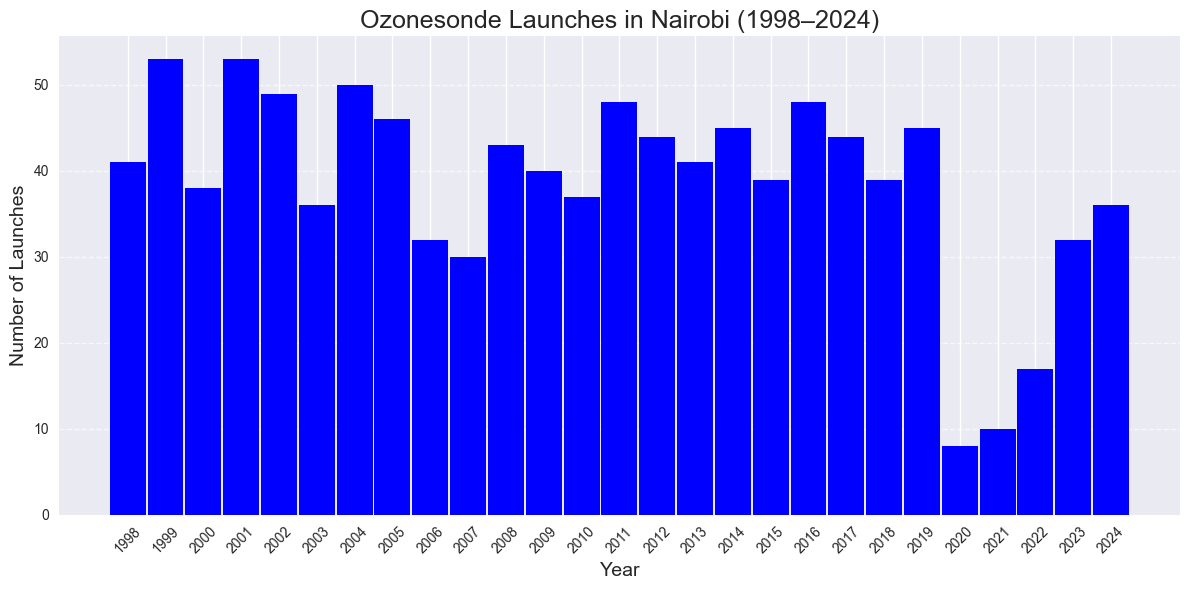

In [6]:
import os
import matplotlib.pyplot as plt

# data Configuration
base_dir = "Ozonesondes"
start_year, end_year = 1998, 2024

years = sorted({
    int(tok)
    for d in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, d))
    for tok in d.split("_")
    if tok.isdigit() and start_year <= int(tok) <= end_year
})

# Count launches per year
launch_counts = []
for year in years:
    year_folder = f"shadoz_nairobi_{year}_V06"
    path = os.path.join(base_dir, year_folder)
    try:
        files = [f for f in os.listdir(path)
                 if os.path.isfile(os.path.join(path, f))]
        count = len(files)
    except FileNotFoundError:
        count = 0
    launch_counts.append(count)

# Total count calculation
total_launches = sum(launch_counts)
print(f"Total launches from {start_year} to {end_year}: {total_launches}")

# Plotting 
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(years, launch_counts, color="blue", width=0.95, align="center")
ax.set_title("Ozonesonde Launches in Nairobi (1998–2024)", fontsize=18)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Number of Launches", fontsize=14)

ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


HIGHEST OZONE EVENTS FROM 1998 TO 2024

In [10]:
import re
import numpy as np
import pandas as pd
from pathlib import Path

base_dir = "Ozonesondes"
start_year, end_year = 1998, 2024

# gather year folders
years = sorted({
    int(tok)
    for d in Path(base_dir).iterdir() if d.is_dir()
    for tok in d.name.split("_")
    if tok.isdigit() and start_year <= int(tok) <= end_year
})

# lightweight reader that tries common delimiters
def try_read_table(p):
    for sep in [",", "\t", None]:
        try:
            df = pd.read_csv(p, sep=sep, engine="python", comment="#", nrows=200000)
            if df.shape[1] >= 1:
                return df
        except Exception:
            continue
    return None

# find ozone column candidate and return max value
def max_o3_from_df(df):
    cols = [c for c in df.columns if re.search(r"\bo3\b|\bozone\b|o3_ppb|o3_ppbv|o3_vmr", c, re.I)]
    if cols:
        return pd.to_numeric(df[cols[0]], errors="coerce").max()
    num = df.select_dtypes(include=["number"])
    if not num.empty:
        return num.max().max()
    return np.nan

records = []
base = Path(base_dir)
for year in years:
    folder = base / f"shadoz_nairobi_{year}_V06"
    if not folder.exists():
        continue
    for f in folder.iterdir():
        if not f.is_file():
            continue
        max_o3 = np.nan
        df = try_read_table(f)
        if df is not None:
            max_o3 = max_o3_from_df(df)
        if np.isnan(max_o3):
            try:
                txt = f.read_text(errors="ignore")
                nums = re.findall(r"\d+\.\d+|\d+", txt)
                nums = [float(n) for n in nums] if nums else []
                max_o3 = max(nums) if nums else np.nan
            except Exception:
                max_o3 = np.nan
        records.append({"file": str(f), "year": year, "launch_id": f.stem, "max_o3": float(max_o3) if not np.isnan(max_o3) else np.nan})

df_rec = pd.DataFrame(records).dropna(subset=["max_o3"])
top5_high = df_rec.sort_values("max_o3", ascending=False).head(5)

print("Top 5 launches with highest observed ozone concentrations:")
for i, r in top5_high.reset_index(drop=True).iterrows():
    print(f"{i+1}. Year: {r['year']}, Launch: {r['launch_id']}, File: {r['file']}, Max O3: {r['max_o3']:.2f}")


Top 5 launches with highest observed ozone concentrations:
1. Year: 2000, Launch: nairobi_20001220T07_SHADOZV06, File: Ozonesondes\shadoz_nairobi_2000_V06\nairobi_20001220T07_SHADOZV06.dat, Max O3: 948166909.00
2. Year: 2000, Launch: nairobi_20001206T07_SHADOZV06, File: Ozonesondes\shadoz_nairobi_2000_V06\nairobi_20001206T07_SHADOZV06.dat, Max O3: 948166907.00
3. Year: 2001, Launch: nairobi_20010124T07_SHADOZV06, File: Ozonesondes\shadoz_nairobi_2001_V06\nairobi_20010124T07_SHADOZV06.dat, Max O3: 948166906.00
4. Year: 2000, Launch: nairobi_20001116T07_SHADOZV06, File: Ozonesondes\shadoz_nairobi_2000_V06\nairobi_20001116T07_SHADOZV06.dat, Max O3: 948166905.00
5. Year: 2000, Launch: nairobi_20001115T07_SHADOZV06, File: Ozonesondes\shadoz_nairobi_2000_V06\nairobi_20001115T07_SHADOZV06.dat, Max O3: 948166904.00


LOWEST OZONE EVENTS FROM 1998 TO 2024

In [ ]:
import re
import numpy as np
import pandas as pd
from pathlib import Path

base_dir = "Ozonesondes"
start_year, end_year = 1998, 2024

# gather year folders
years = sorted({
    int(tok)
    for d in Path(base_dir).iterdir() if d.is_dir()
    for tok in d.name.split("_")
    if tok.isdigit() and start_year <= int(tok) <= end_year
})

# lightweight reader that tries common delimiters
def try_read_table(p):
    for sep in [",", "\t", None]:
        try:
            df = pd.read_csv(p, sep=sep, engine="python", comment="#", nrows=200000)
            if df.shape[1] >= 1:
                return df
        except Exception:
            continue
    return None

# find ozone column candidate and return min value
def min_o3_from_df(df):
    cols = [c for c in df.columns if re.search(r"\bo3\b|\bozone\b|o3_ppb|o3_ppbv|o3_vmr", c, re.I)]
    if cols:
        return pd.to_numeric(df[cols[0]], errors="coerce").min()
    num = df.select_dtypes(include=["number"])
    if not num.empty:
        return num.min().min()
    return np.nan

records = []
base = Path(base_dir)
for year in years:
    folder = base / f"shadoz_nairobi_{year}_V06"
    if not folder.exists():
        continue
    for f in folder.iterdir():
        if not f.is_file():
            continue
        min_o3 = np.nan
        df = try_read_table(f)
        if df is not None:
            min_o3 = min_o3_from_df(df)
        if np.isnan(min_o3):
            try:
                txt = f.read_text(errors="ignore")
                nums = re.findall(r"\d+\.\d+|\d+", txt)
                nums = [float(n) for n in nums] if nums else []
                min_o3 = min(nums) if nums else np.nan
            except Exception:
                min_o3 = np.nan
        records.append({"file": str(f), "year": year, "launch_id": f.stem, "min_o3": float(min_o3) if not np.isnan(min_o3) else np.nan})

df_rec = pd.DataFrame(records).dropna(subset=["min_o3"])
top5_low = df_rec.sort_values("min_o3", ascending=True).head(5)

print("Top 5 launches with lowest observed ozone concentrations:")
for i, r in top5_low.reset_index(drop=True).iterrows():
    print(f"{i+1}. Year: {r['year']}, Launch: {r['launch_id']}, File: {r['file']}, Min O3: {r['min_o3']:.2f}")


Top 5 launches with lowest observed ozone concentrations:
1. Year: 1998, Launch: nairobi_19980107T05_SHADOZV06, File: Ozonesondes\shadoz_nairobi_1998_V06\nairobi_19980107T05_SHADOZV06.dat, Min O3: 0.00
2. Year: 1998, Launch: nairobi_19980114T05_SHADOZV06, File: Ozonesondes\shadoz_nairobi_1998_V06\nairobi_19980114T05_SHADOZV06.dat, Min O3: 0.00
3. Year: 1998, Launch: nairobi_19980121T06_SHADOZV06, File: Ozonesondes\shadoz_nairobi_1998_V06\nairobi_19980121T06_SHADOZV06.dat, Min O3: 0.00
4. Year: 1998, Launch: nairobi_19980128T04_SHADOZV06, File: Ozonesondes\shadoz_nairobi_1998_V06\nairobi_19980128T04_SHADOZV06.dat, Min O3: 0.00
5. Year: 1998, Launch: nairobi_19980204T05_SHADOZV06, File: Ozonesondes\shadoz_nairobi_1998_V06\nairobi_19980204T05_SHADOZV06.dat, Min O3: 0.00
